# Regresión Lineal Multiple
 
El encuentro pasado entrenamos un modelo de Regresión Linear Simple que únicamente tenía dos variables: la variable predictora y la variable a predecir. Ahora entrenaremos una Regresión Linear Multiple con el dataset que utilizamos previamente del Clima para predecir la temperatura.

Dado que en los encuentos pasados realizamos la exploraciòn y la limpieza del dataset, ahora realizaremos los siguientes pasos:

1. Dividir los datos en **X** (variables predictoras) e **y** (variable a predecir)
2. Dividir los datos en entrenamiento y testo con el méodo *train_test_split*
3. Importar e instanciar el modelo que utilizaremos y definir hiperparámetros
4. Entrenar el modelo con el método *fit*
5. Testear el modelo con el método *predict*
6. Ver la performance con una métrica 

In [1]:
#importamos las librerías que utilizaremos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Desde el archivo descargado en la computadora

In [2]:
data = pd.read_csv("data_clima.csv")

In [3]:
# Observamos el dataset que limpiamos en las clases anteriores

data.head(3)

,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,temperatura,descripcion__Normal,descripcion__Warm
0,0.92,11.27,130.0,8.05,1021.60,0,-0.56,0,0
1,0.73,20.93,330.0,16.10,1017.00,1,21.11,0,1
2,0.97,5.97,193.0,14.91,1013.99,1,16.60,1,0


In [4]:
# vemos la información del dataset: cantidad de registros, tipos de dato y nulos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   humedad               9995 non-null   float64
 1   velocidad_viento_kmh  9995 non-null   float64
 2   rumbo_viento_grados   9995 non-null   float64
 3   visibilidad_km        9995 non-null   float64
 4   presion_mbar          9995 non-null   float64
 5   lluvia                9995 non-null   int64  
 6   temperatura           9995 non-null   float64
 7   descripcion__Normal   9995 non-null   int64  
 8   descripcion__Warm     9995 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 702.9 KB


#### División de datos en entrenamiento y testeo

Ahora vamos a separar el Dataset para crear X e y considerando que **X** son las variable predictoras, en este caso todas menos *temperatura* por lo que utilizaremos el método *drop* para eliminar esa columna e **y** es la variable a predecir *temperatura*.

Luego lo separaremos nuevamente entre datos de Entrenamiento y Teseto para lo cual usaremos [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split) de la librería de Scikit-learn. 

In [5]:
data.shape

(9995, 9)

In [6]:
# Creamos X (variables predictoras) e y (variable a predecir)

X = data.drop(columns="temperatura")
y = data["temperatura"]

In [7]:
# Confirmamos que se realizo correctamente observando X

print(X.shape)
X.head(3)

(9995, 8)


,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion__Normal,descripcion__Warm
0,0.92,11.27,130.0,8.05,1021.60,0,0,0
1,0.73,20.93,330.0,16.10,1017.00,1,0,1
2,0.97,5.97,193.0,14.91,1013.99,1,1,0


In [8]:
# Confirmamos que se realizo correctamente observando y

print(y.shape)
y.head(3)

(9995,)


0    -0.56
1    21.11
2    16.60
Name: temperatura, dtype: float64

In [9]:
# Importamos train_test_split de la libreria scikit-learn

from sklearn.model_selection import train_test_split 

In [10]:
# Definimos X de entrenamiento y de testeo e y de entrenamiento y testeo

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=48)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7496, 8)
(7496,)
(2499, 8)
(2499,)


#### Entrenamiento del modelo

En primer lugar importaremos e instanciaremos el modelo que utilizaremos, en este caso [regresion lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de la librería Scikit-Learn. Los valores de los hiperparámetros se dejaran por default.

Luego realizaremos el entrenamiento del modelo con el método *fit* y los datos de **entrenamiento**. El resultado será un modelo entrenado de regresión lineal de la cual podremos ver los parámetros: *pendiente de la recta* e *intercepto*(ordenada al origen).



In [12]:
# Importamos el modelo que utilizaremos. Regresión lineal: 

from sklearn.linear_model import LinearRegression

In [13]:
# Definimos un objeto con el modelo importado, en este caso los hiperparametros son por default por lo que el parentesis está vacio

modelo_rl = LinearRegression()

In [14]:
# Realizamos el entrenamiento del modelo con el método fit y los datos de entrenamiento 

modelo_rl.fit(X_train, y_train)

LinearRegression()

##### Parámetros 

Los parámetros de una Regresión Lineal son el coeficiente (*pendiente de la recta*) y el intercepto (*ordenada al orignen*: punto en *y* que *x=0*), en este caso se obtienden como resultado del entrenamiento del modelo

In [15]:
# Coeficiente (la pendiente de la recta)

modelo_rl.coef_


array([-7.75338587e+00, -7.09614427e-02,  1.10791575e-03,  6.40664408e-02,
       -1.00577414e-04,  5.56581033e+00,  8.48358792e+00,  1.91894484e+01])

In [16]:
# Intercepto (el punto de comienzo de la recta en el eje y)

modelo_rl.intercept_

3.5328273392664062

#### Testeo del modelo

Ahora probaremos nuestro modelo con el método *predict* y los datos de testeo (X_test) para ver el resultado y compararlo con el resultado final a través de distintas métricas

- [MAE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html?highlight=mean_absolute_error#sklearn.metrics.mean_absolute_error(): Media del Error Absoluto 

- [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html?highlight=mean_squared_error#sklearn.metrics.mean_squared_error): La Media del Error cuadrático

- RMSE: La raíz del error cuadrático medio 

- [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score)


In [17]:
# Probar nuestro modelo con los datos de test

y_pred = modelo_rl.predict(X_test)
y_pred

array([10.68564909, 23.21982556, 12.15856185, ...,  1.76278094,
       -4.14014847, 23.40415859])

In [18]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

2.8156196891507417

In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

12.049341830270448

In [21]:
# importamos la libería numpy para calcular la raíz cuadrada para RMSE

import numpy as np

In [22]:
rmse = np.sqrt(mse)

In [23]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.868105910809341

##### Vemos los resultados de la performance del modelo con distintas métricas

In [24]:
print("La Media del Error Absoluto  del modelo es", round(mae,2))
print("La Media del Error cuadrático del modelo es", round(mse,2))
print("La raíz del error cuadrático medio del modelo es", round(rmse,2))
print("El R2 del modelo es", round(r2,2))

La Media del Error Absoluto  del modelo es 2.82
La Media del Error cuadrático del modelo es 12.05
La raíz del error cuadrático medio del modelo es 3.47
El R2 del modelo es 0.87


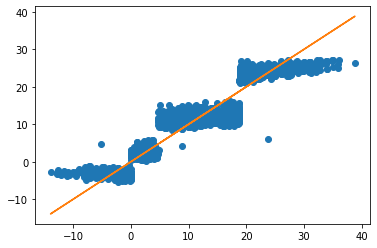

In [27]:
plt.plot(y_test,y_pred,'o')
plt.plot(y_test,y_test,'-')